# Validating Fandango Movie Ratings with Machine Learning
## Overview

Are all **online reviews** really reliable? The majority of people decide to watch movies solely based on such reviews, and it paves the way for movie companies to take advantage of people. In fact, online reviews can easily win the public trust and thus heavily promote certain movies, creating a preconception in people's minds. 

### Goal:

**The goal is to complete the tasks below based on the 538 article and see if we reach a similar conclusion. We will need to use our pandas and visualization skills to determine if Fandango's ratings in 2015 had a bias towards rating movies better to sell more tickets.**



---
----

## Part One: Understanding the Background and Data


**Useful article to read: [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/)**

----

**TASK: Considering the article above, pay attention to these two tables giving an overview of the two .csv files we will be working with:**

### The Data

This is the data behind the story [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/) openly available on 538's Github: https://github.com/fivethirtyeight/data. There are two CSV files, one with Fandango Stars and Displayed Ratings, and the other with aggregate data for movie ratings from other sites, like Metacritic, IMDB, and Rotten Tomatoes.

#### all_sites_scores.csv

-----

`all_sites_scores.csv` contains every film that has a Rotten Tomatoes rating, an RT User rating, a Metacritic score, a Metacritic User score, an IMDb score, and at least 30 fan reviews on Fandango. The data from Fandango was pulled on Aug. 24, 2015.

Column | Definition
--- | -----------
FILM | The film in question
RottenTomatoes | The Rotten Tomatoes Tomatometer score  for the film
RottenTomatoes_User | The Rotten Tomatoes user score for the film
Metacritic | The Metacritic critic score for the film
Metacritic_User | The Metacritic user score for the film
IMDB | The IMDb user score for the film
Metacritic_user_vote_count | The number of user votes the film had on Metacritic
IMDB_user_vote_count | The number of user votes the film had on IMDb

----
----

#### fandango_scape.csv

`fandango_scrape.csv` contains every film 538 pulled from Fandango.

Column | Definiton
--- | ---------
FILM | The movie
STARS | Number of stars presented on Fandango.com
RATING |  The Fandango ratingValue for the film, as pulled from the HTML of each page. This is the actual average score the movie obtained.
VOTES | number of people who had reviewed the film at the time we pulled it.

----

**IMPORTING LIBRARIES:**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Part Two: Exploring Fandango Displayed Scores versus True User Ratings

Let's first explore the Fandango ratings to see if our analysis agrees with the article's conclusion.

**Importing the fandango_scrape.csv file**

In [4]:
fandango = pd.read_csv('fandango_scrape.csv')

In [5]:
fandango.head(5)

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [6]:
fandango.info

<bound method DataFrame.info of                                      FILM  STARS  RATING  VOTES
0             Fifty Shades of Grey (2015)    4.0     3.9  34846
1                   Jurassic World (2015)    4.5     4.5  34390
2                  American Sniper (2015)    5.0     4.8  34085
3                        Furious 7 (2015)    5.0     4.8  33538
4                       Inside Out (2015)    4.5     4.5  15749
..                                    ...    ...     ...    ...
499                      Valiyavan (2015)    0.0     0.0      0
500            WWE SummerSlam 2015 (2015)    0.0     0.0      0
501       Yagavarayinum Naa Kaakka (2015)    0.0     0.0      0
502  Yesterday, Today and Tomorrow (1964)    0.0     0.0      0
503                         Zarafa (2012)    0.0     0.0      0

[504 rows x 4 columns]>

In [7]:
fandango.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
STARS,504.0,3.558532,1.563133,0.0,3.5,4.0,4.50,5.0
RATING,504.0,3.375794,1.491223,0.0,3.1,3.8,4.30,5.0
VOTES,504.0,1147.863095,3830.583136,0.0,3.0,18.5,189.75,34846.0


**Eexplore the correlation between the popularity of a film and its rating. Create a scatterplot showing the relationship between rating and votes. Feel free to edit visual styling to your preference.**

<Axes: xlabel='RATING', ylabel='VOTES'>

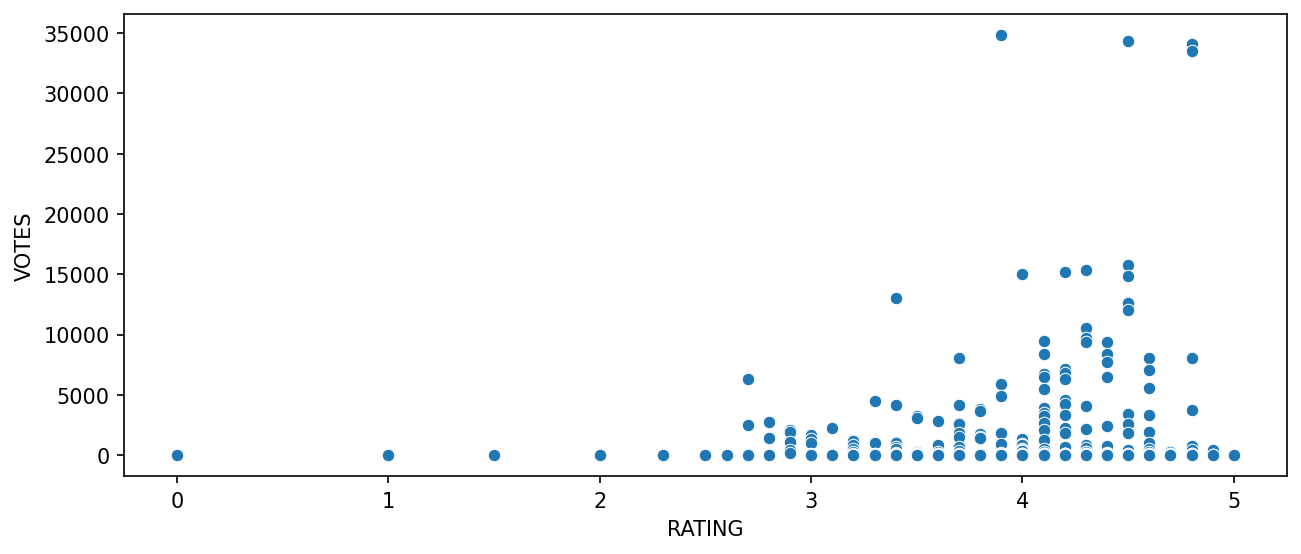

In [8]:
plt.figure(figsize=(10,4), dpi=150)
sns.scatterplot(data=fandango, x='RATING', y='VOTES')

#### **Calculating the correlation between the columns:**

In [20]:
fandango[['STARS','RATING','VOTES']]

,STARS,RATING,VOTES
0,4.0,3.9,34846
1,4.5,4.5,34390
2,5.0,4.8,34085
3,5.0,4.8,33538
4,4.5,4.5,15749
...,...,...,...
499,0.0,0.0,0
500,0.0,0.0,0
501,0.0,0.0,0
502,0.0,0.0,0


In [21]:
fandango[['STARS','RATING','VOTES']].corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


In [22]:
fandango.corr(numeric_only=True)

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


#### **Every row in the FILM title column has the same format:**

    Film Title Name (Year)
    
#### **We create a new column that is able to strip the year from the title strings and set this new column as YEAR**

In [25]:
fandango['YEAR'] = fandango['FILM'].apply(lambda title: title.split('(')[-1])

In [26]:
fandango

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015)
1,Jurassic World (2015),4.5,4.5,34390,2015)
2,American Sniper (2015),5.0,4.8,34085,2015)
3,Furious 7 (2015),5.0,4.8,33538,2015)
4,Inside Out (2015),4.5,4.5,15749,2015)
...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015)
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015)
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015)
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964)


In [27]:
fandango['YEAR'] = fandango['YEAR'].apply(lambda year: year[:-1])

In [28]:
fandango

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964


**Combining the two parts into one code:**

In [29]:
fandango['YEAR'] = fandango['FILM'].apply(lambda title: title.split('(')[-1][:-1])

In [30]:
fandango

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964


#### **How many movies are in the Fandango DataFrame per year?**

In [32]:
fandango[['YEAR','FILM']].groupby('YEAR').count()

,FILM
YEAR,
1964,1
2012,1
2014,23
2015,478
2016,1


In [33]:
fandango['YEAR'].value_counts()

YEAR
2015    478
2014     23
2016      1
1964      1
2012      1
Name: count, dtype: int64

#### Visualize the count of movies per year with a plot:**

<Axes: xlabel='YEAR', ylabel='count'>

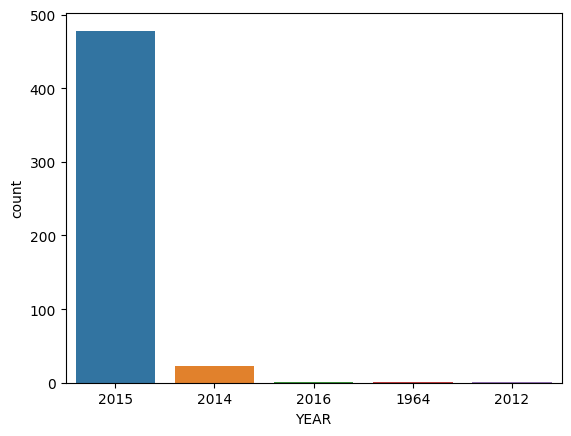

In [35]:
sns.countplot(data=fandango, x='YEAR', hue='YEAR')

#### **What are the 10 movies with the highest number of votes?**

In [40]:
fandango.nlargest(10, 'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


### **How many movies have zero votes?**

In [41]:
fandango[fandango['VOTES'] == 0]

,FILM,STARS,RATING,VOTES,YEAR
435,6 Years (2015),0.0,0.0,0,2015
436,7 Minutes (2015),0.0,0.0,0,2015
437,A Year in Champagne (2015),0.0,0.0,0,2015
438,Balls Out (2015),0.0,0.0,0,2015
439,Before I Wake (2015),0.0,0.0,0,2015
...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964


In [42]:
fandango[fandango['VOTES'] == 0].count()

FILM      69
STARS     69
RATING    69
VOTES     69
YEAR      69
dtype: int64

In [45]:
no_votes = fandango['VOTES'] == 0
no_votes.sum()

69

#### **Create DataFrame of only reviewed films by removing any films that have zero votes.**

In [47]:
fan_reviewed = fandango[fandango['VOTES'] != 0]
fan_reviewed_1 = fandango[fandango['VOTES'] > 0]

In [48]:
fan_reviewed == fan_reviewed_1

,FILM,STARS,RATING,VOTES,YEAR
0,True,True,True,True,True
1,True,True,True,True,True
2,True,True,True,True,True
3,True,True,True,True,True
4,True,True,True,True,True
...,...,...,...,...,...
430,True,True,True,True,True
431,True,True,True,True,True
432,True,True,True,True,True
433,True,True,True,True,True


----
## Visualization of the differences in distributions

**As noted in the article, due to HTML and star rating displays, the true user rating may be slightly different than the rating shown to a user. Let's visualize this difference in distributions.**

#### Creating a KDE plot (or multiple kdeplots) that displays the distribution of ratings that are displayed (STARS) versus what the true rating was from votes (RATING). (Clip the KDEs to 0-5)

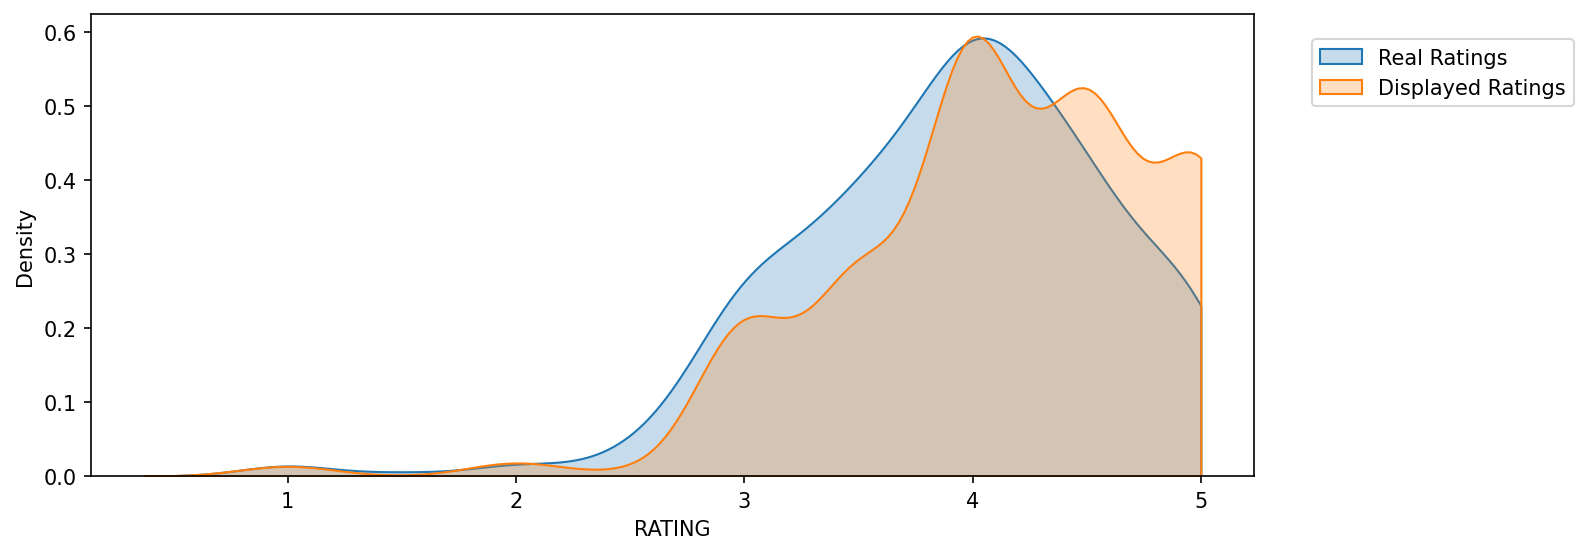

In [63]:
plt.figure(figsize=(10,4), dpi=150)
sns.kdeplot(data=fan_reviewed, x= 'RATING', clip=[0,5], fill=True, label='Real Ratings')
sns.kdeplot(data=fan_reviewed, x= 'STARS', clip=[0,5], fill=True, label='Displayed Ratings')    

plt.legend(loc=(1.05,.8))

### Quantification of the discrepancy

**Create a new column of the different between STARS displayed versus true RATING. Calculate this difference with STARS-RATING and round these differences to the nearest decimal point.**

In [68]:
fan_reviewed['STARS_DIFF'] = fan_reviewed['STARS'] - fan_reviewed['RATING']

/var/folders/br/pq4r4jdj7n370js8hxvml1vm0000gn/T/ipykernel_51763/1435696898.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fan_reviewed['STARS_DIFF'] = fan_reviewed['STARS'] - fan_reviewed['RATING']


In [72]:
fan_reviewed.loc[:, 'STARS_DIFF'] = fan_reviewed['STARS'] - fan_reviewed['RATING']
fan_reviewed.loc[:, 'STARS_DIFF'] = fan_reviewed['STARS_DIFF'].round(2) 
fan_reviewed

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


### Creating a count plot to display the number of times a certain difference occurs

<Axes: xlabel='STARS_DIFF', ylabel='count'>

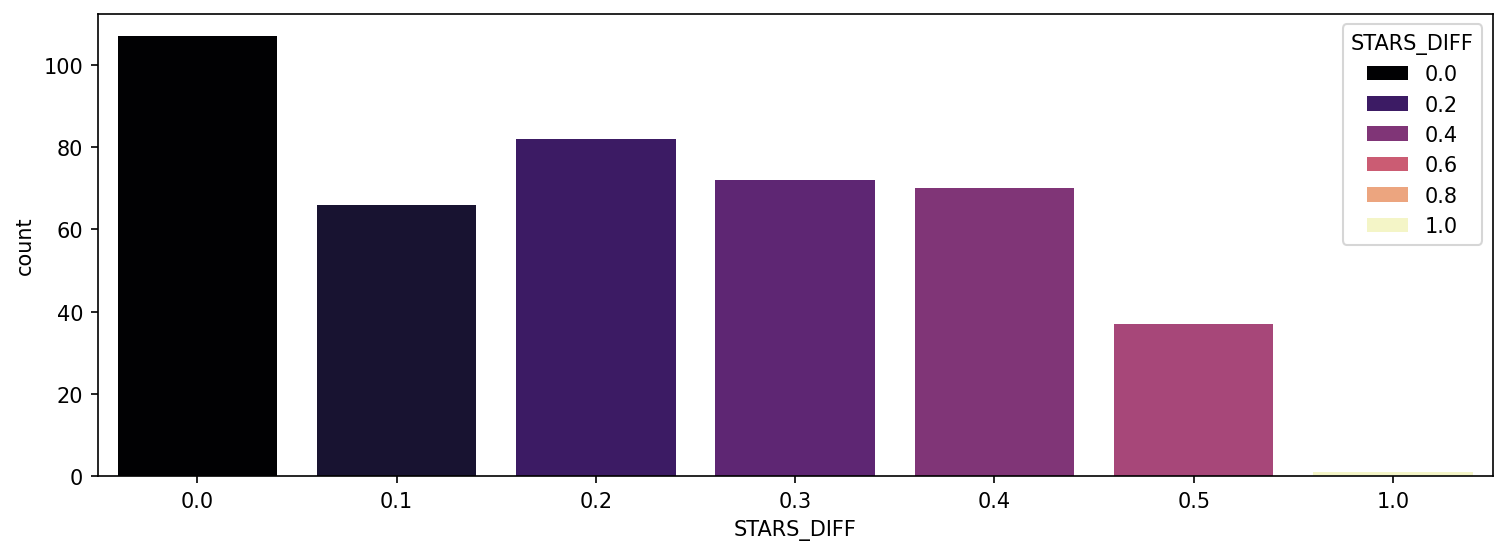

In [74]:
plt.figure(figsize=(12,4), dpi=150)
sns.countplot(data=fan_reviewed, x='STARS_DIFF', hue='STARS_DIFF', palette='magma')

**We can see from the plot that one movie was displaying over a 1 star difference than its true rating! What movie had this close to 1 star differential?**

In [75]:
fan_reviewed[fan_reviewed['STARS_DIFF']== 1]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


## Part Three: Comparison of Fandango Ratings to Other Sites

Let's now compare the scores from Fandango to other movies sites and see how they compare.

#### Importing "all_sites_scores.csv" file**

In [77]:
all_sites = pd.read_csv("all_sites_scores.csv")

### Explore the DataFrame columns, info, description

In [78]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [80]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.3+ KB


In [82]:
all_sites.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
RottenTomatoes,146.0,60.849315,30.168799,5.0,31.25,63.50,89.00,100.0
RottenTomatoes_User,146.0,63.876712,20.024430,20.0,50.00,66.50,81.00,94.0
Metacritic,146.0,58.808219,19.517389,13.0,43.50,59.00,75.00,94.0
Metacritic_User,146.0,6.519178,1.510712,2.4,5.70,6.85,7.50,9.6
IMDB,146.0,6.736986,0.958736,4.0,6.30,6.90,7.40,8.6
Metacritic_user_vote_count,146.0,185.705479,316.606515,4.0,33.25,72.50,168.50,2375.0
IMDB_user_vote_count,146.0,42846.205479,67406.509171,243.0,5627.00,19103.00,45185.75,334164.0


## Rotten Tomatoes

Let's first take a look at Rotten Tomatoes. RT has two sets of reviews, their critics reviews (ratings published by official critics) and user reviews. 

#### Creating a scatterplot exploring the relationship between RT Critic reviews and RT User reviews

(0.0, 100.0)

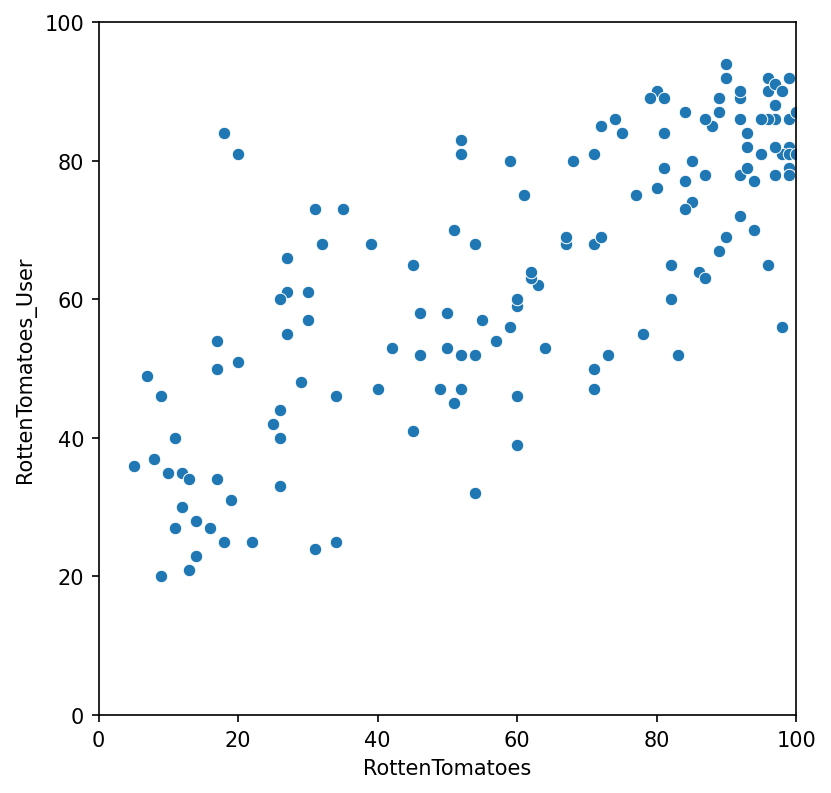

In [87]:
plt.figure(figsize=(6,6), dpi=150)
sns.scatterplot(data=all_sites, x='RottenTomatoes', y='RottenTomatoes_User')
plt.xlim(0, 100)
plt.ylim(0, 100)

Let's quantify this difference by comparing the critics ratings and the RT User ratings. We will calculate this with RottenTomatoes-RottenTomatoes_User. 

**Note: Rotten_Diff here is Critics - User Score.** So values closer to 0 means aggrement between Critics and Users. Larger positive values means critics rated much higher than users. Larger negative values means users rated much higher than critics.

**Create a new column based on the difference between critics ratings and users ratings for Rotten Tomatoes.** 

**Calculate this with RottenTomatoes-RottenTomatoes_User**

In [90]:
all_sites.loc[:, 'Rotten_Diff'] = all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']

In [93]:
all_sites.head(3)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10


Let's now compare the overall mean difference. Since we're dealing with differences that could be negative or positive, first take the absolute value of all the differences, then take the mean. This would report back on average to absolute difference between the critics rating versus the user rating.

In [94]:
all_sites['Rotten_Diff'].apply(abs).mean()

15.095890410958905

### Visualization of 'Rotten_Diff'

**We will plot the distribution of the differences between RT Critics Score and RT User Score. There should be negative values in this distribution plot. Feel free to use KDE or Histograms to display this distribution.**

<Axes: xlabel='Rotten_Diff', ylabel='Count'>

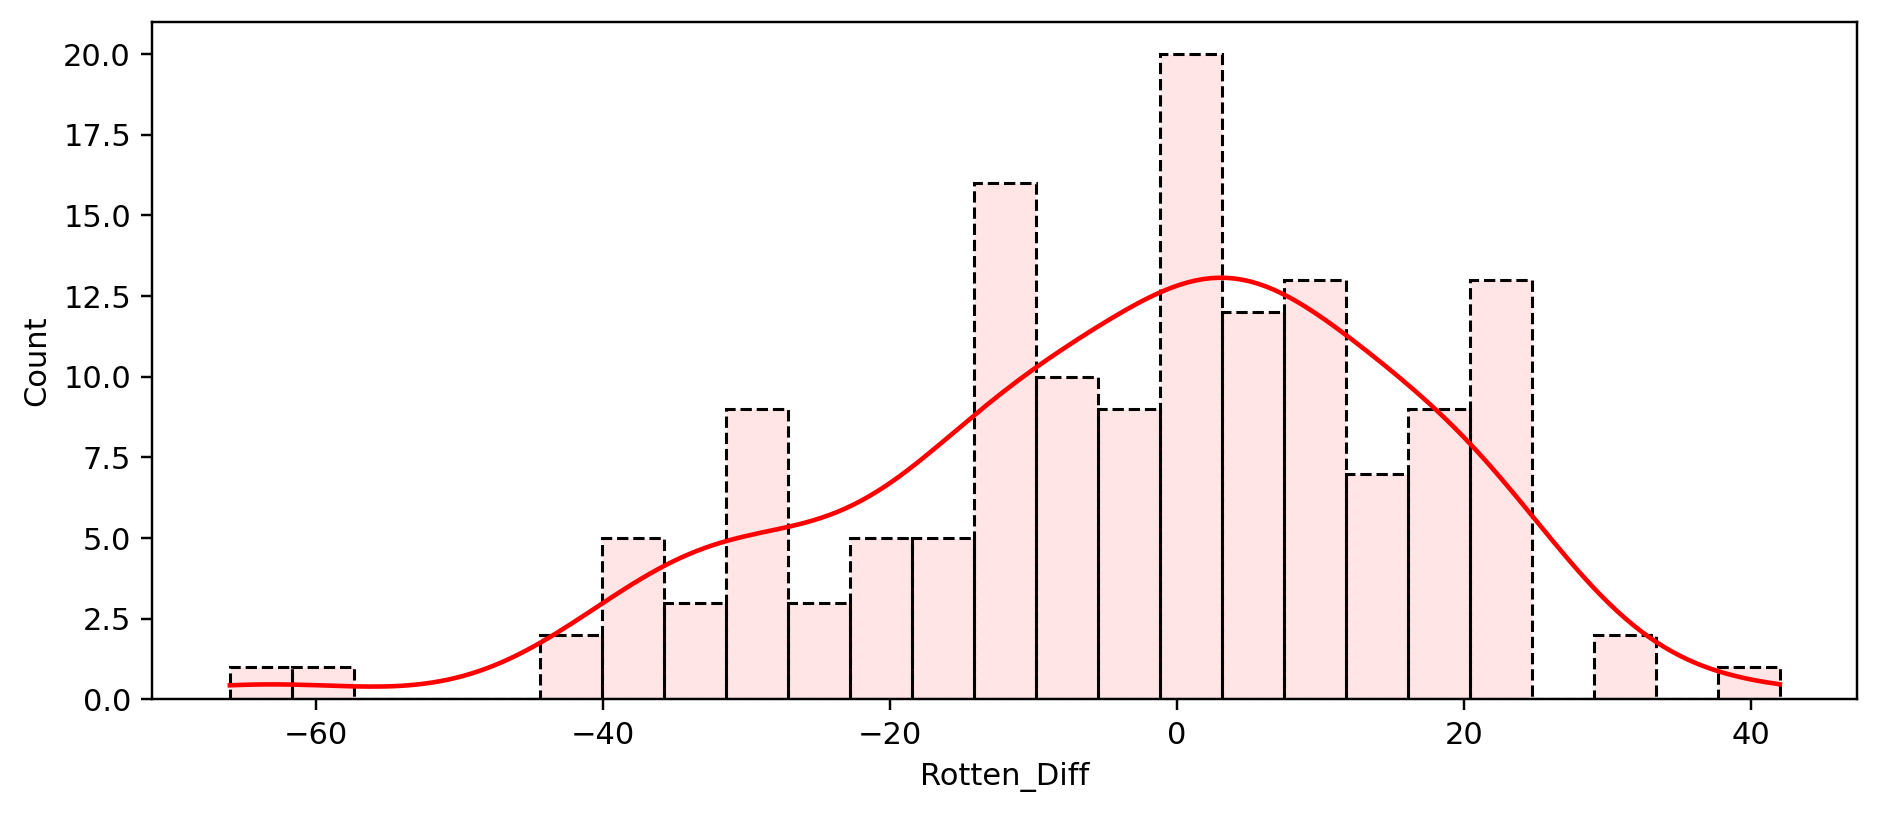

In [100]:
plt.figure(figsize=(10,4), dpi=220)
sns.histplot(data=all_sites, x='Rotten_Diff', bins=25, color='red', edgecolor='black', ls='--',alpha=.1, kde=True)

### showing the *absolute value* difference between Critics and Users on Rotten Tomatoes

<Axes: xlabel='Rotten_Diff', ylabel='Count'>

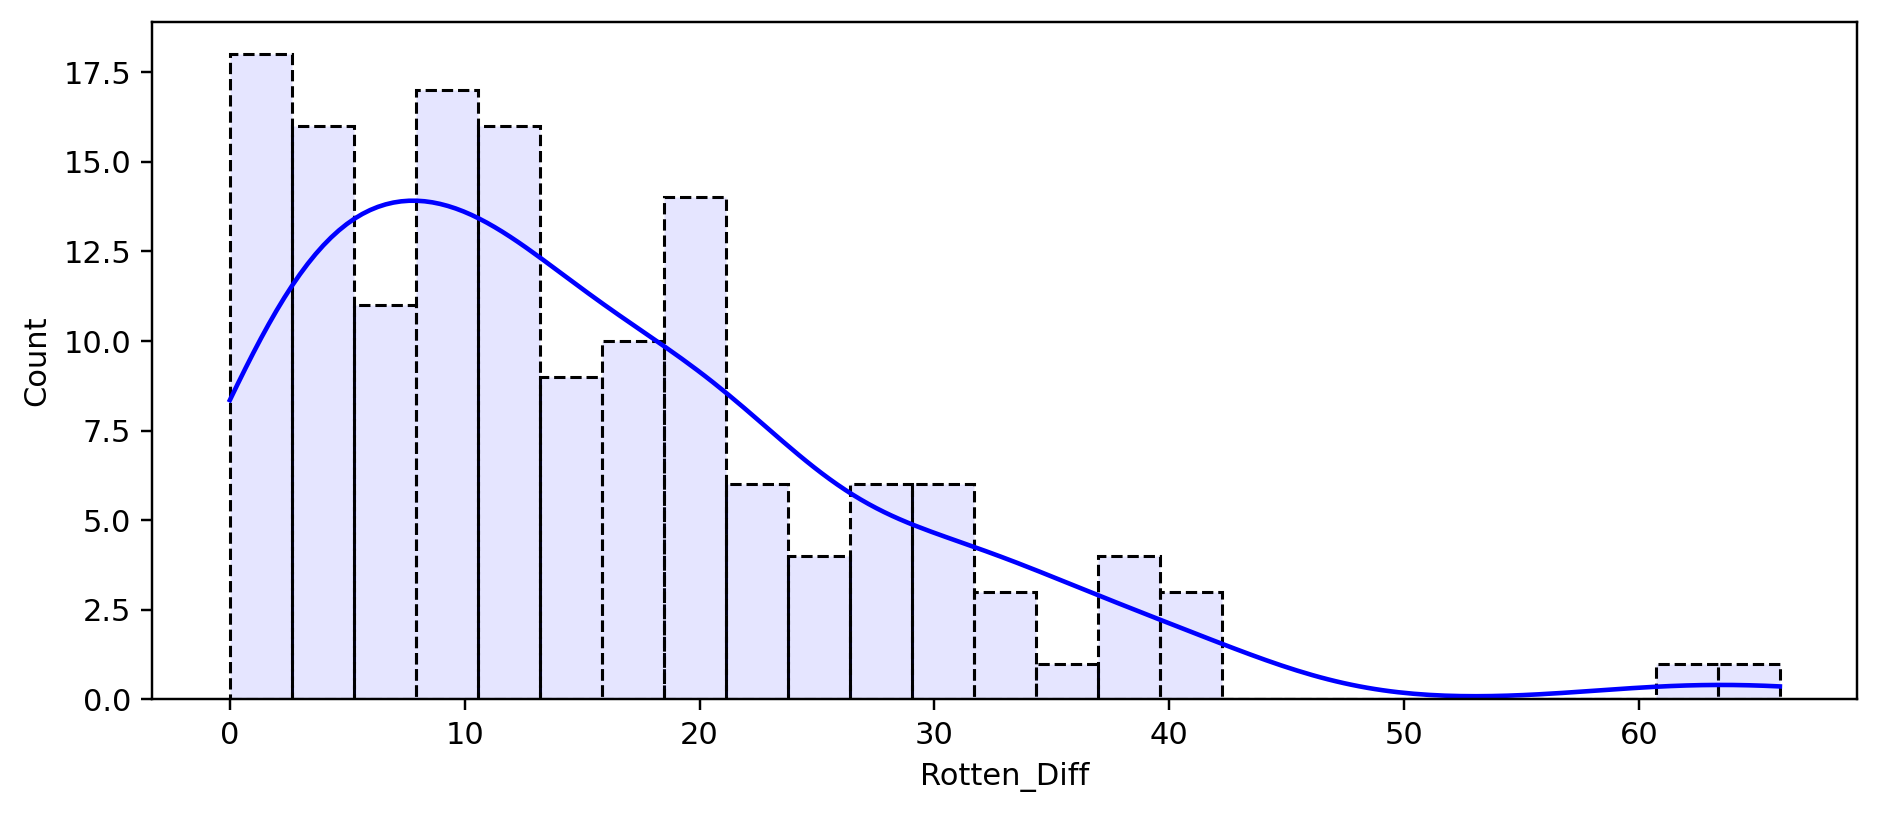

In [102]:
plt.figure(figsize=(10,4), dpi=220)
sns.histplot(x=all_sites['Rotten_Diff'].apply(abs), bins=25, color='blue', edgecolor='black', ls='--',alpha=.1, kde=True)

**Let's find out which movies are causing the largest differences. First, show the top 5 movies with the largest *negative* difference between Users and RT critics. Since we calculated the difference as Critics Rating - Users Rating, then large negative values imply the users rated the movie much higher on average than the critics did.**

#### The top 5 movies that users rated higher than critics on average:

In [113]:
print('\nThe most underrated movies based on critics:\n\n')
all_sites.nsmallest(5, 'Rotten_Diff')[['FILM', 'Rotten_Diff']]


The most underrated movies based on critics:




,FILM,Rotten_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
105,Hitman: Agent 47 (2015),-42
134,The Longest Ride (2015),-42
125,The Wedding Ringer (2015),-39


#### The top 5 movies critics scores higher than users on average:

In [114]:
print('\nThe most underrated movies based on users:\n\n')
all_sites.nlargest(5, 'Rotten_Diff')[['FILM', 'Rotten_Diff']]


The most underrated movies based on users:




,FILM,Rotten_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
37,Welcome to Me (2015),24
40,I'll See You In My Dreams (2015),24


## MetaCritic

Now let's take a quick look at the ratings from MetaCritic. Metacritic also shows an average user rating versus their official displayed rating.

**Displaying a scatterplot of the Metacritic Rating versus the Metacritic User rating.**

(0.0, 10.0)

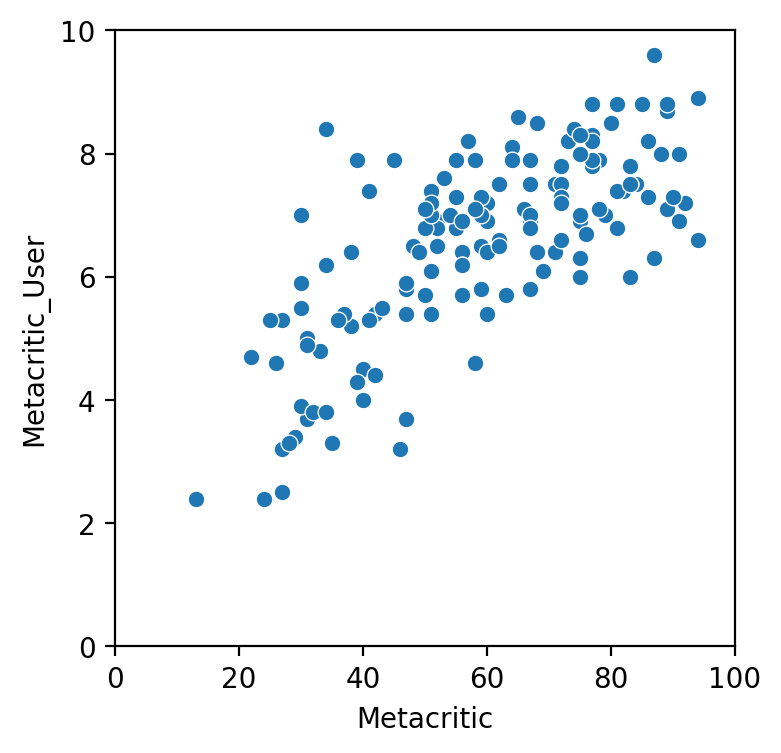

In [118]:
plt.figure(figsize=(4,4), dpi=200)
sns.scatterplot(data=all_sites, x='Metacritic', y='Metacritic_User')
plt.xlim(0,100)
plt.ylim(0,10)

## IMBD

Finally, let's explore IMDB. Notice that both Metacritic and IMDB report back vote counts. Let's analyze the most popular movies.

**Creating a scatterplot for the relationship between vote counts on MetaCritic versus vote counts on IMDB.**

<Axes: xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

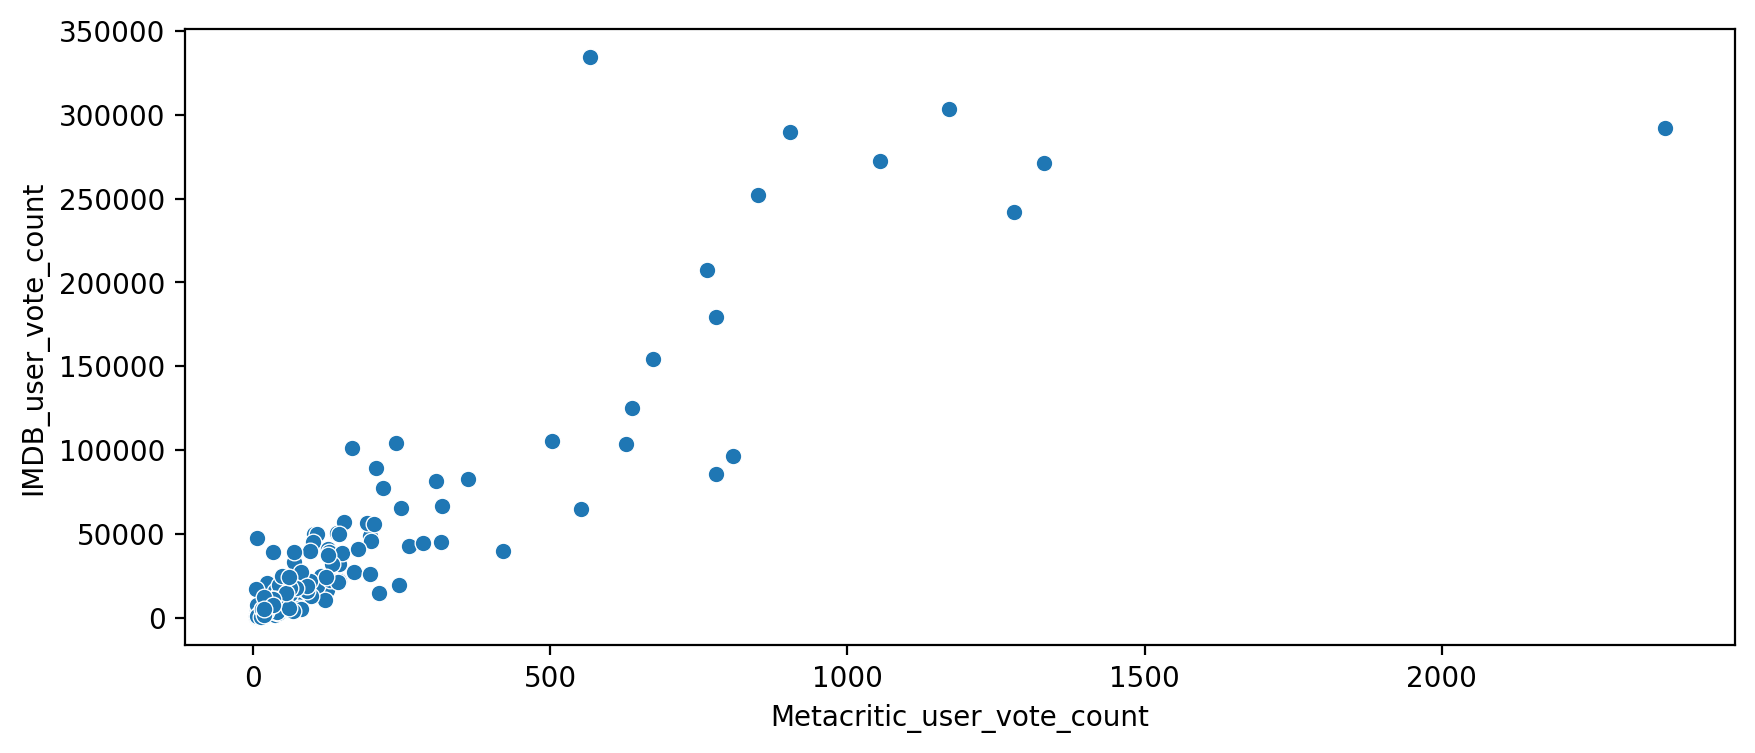

In [122]:
plt.figure(figsize=(10,4), dpi=200)
sns.scatterplot(data=all_sites, x='Metacritic_user_vote_count', y='IMDB_user_vote_count')

**Apparently, there are two outliers here. The movie with the highest vote count on IMDB only has about 500 Metacritic ratings. What is this movie?**

#### The movie that has the highest IMDB user vote count

In [124]:
all_sites.iloc[all_sites['IMDB_user_vote_count'].argmax()]

FILM                          The Imitation Game (2014)
RottenTomatoes                                       90
RottenTomatoes_User                                  92
Metacritic                                           73
Metacritic_User                                     8.2
IMDB                                                8.1
Metacritic_user_vote_count                          566
IMDB_user_vote_count                             334164
Rotten_Diff                                          -2
Name: 14, dtype: object

In [125]:
all_sites.nlargest(1, 'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


#### The movie that has the highest Metacritic User Vote count

In [126]:
all_sites.nlargest(1, 'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


## Fandango Scores vs. All Sites

Finally, let's explore whether or not Fandango artificially displays higher ratings than warranted to boost ticket sales.

**We will Combine the Fandango Table with the All Sites table. Not every movie in the Fandango table is in the All Sites table, since some Fandango movies have very little or no reviews. We only want to compare movies that are in both DataFrames, so do an *inner* merge to merge together both DataFrames based on the FILM columns.**

In [129]:
df = pd.merge(all_sites, fandango, how='inner', on='FILM')

In [130]:
df.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,STARS,RATING,VOTES,YEAR
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12,5.0,4.5,14846,2015
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5,5.0,4.5,12640,2015
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10,5.0,4.5,12055,2015
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66,5.0,4.5,1793,2015
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14,3.5,3.0,1021,2015


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   RottenTomatoes              145 non-null    int64  
 2   RottenTomatoes_User         145 non-null    int64  
 3   Metacritic                  145 non-null    int64  
 4   Metacritic_User             145 non-null    float64
 5   IMDB                        145 non-null    float64
 6   Metacritic_user_vote_count  145 non-null    int64  
 7   IMDB_user_vote_count        145 non-null    int64  
 8   Rotten_Diff                 145 non-null    int64  
 9   STARS                       145 non-null    float64
 10  RATING                      145 non-null    float64
 11  VOTES                       145 non-null    int64  
 12  YEAR                        145 non-null    object 
dtypes: float64(4), int64(7), object(2)


## Normalize columns to Fandango STARS and RATINGS 0-5 

Notice that RT, Metacritic, and IMDB don't use a score between 0-5 stars like Fandango does. In order to do a fair comparison, we need to *normalize* these values, so they all fall between 0-5 stars and the relationship between reviews stays the same.

**Creating new normalized columns for all ratings so they match up within the 0-5 star range shown on Fandango. There are many ways to do this.**

Hint link: https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame


Easier Hint:

Keep in mind, a simple way to convert ratings:

* 100/20 = 5 
* 10/2 = 5

In [137]:
df['RT_Norm'] = np.round(df['RottenTomatoes'] / 20, 1)
df['RT_U_Norm'] = np.round(df['RottenTomatoes_User'] / 20, 1)

In [138]:
df['Meta_Norm'] = np.round(df['Metacritic'] / 20, 1)
df['Meta_U_Norm'] = np.round(df['Metacritic_User'] / 2, 1)

In [139]:
df['IMDB_Norm'] = np.round(df['IMDB'] / 2, 1)

In [140]:
df.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,STARS,RATING,VOTES,YEAR,RT_Norm,RT_U_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12,5.0,4.5,14846,2015,3.7,4.3,3.3,3.6,3.9
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5,5.0,4.5,12640,2015,4.2,4.0,3.4,3.8,3.6
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10,5.0,4.5,12055,2015,4.0,4.5,3.2,4.0,3.9
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66,5.0,4.5,1793,2015,0.9,4.2,1.1,2.4,2.7
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14,3.5,3.0,1021,2015,0.7,1.4,1.4,1.7,2.6


**create a norm_scores DataFrame that only contains the normalizes ratings. Include both STARS and RATING from the original Fandango table.**

In [142]:
norm_scores = df[['STARS','RATING','RT_Norm','RT_U_Norm','Meta_Norm','Meta_U_Norm','IMDB_Norm']]

In [143]:
norm_scores.head()

,STARS,RATING,RT_Norm,RT_U_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,5.0,4.5,3.7,4.3,3.3,3.6,3.9
1,5.0,4.5,4.2,4.0,3.4,3.8,3.6
2,5.0,4.5,4.0,4.5,3.2,4.0,3.9
3,5.0,4.5,0.9,4.2,1.1,2.4,2.7
4,3.5,3.0,0.7,1.4,1.4,1.7,2.6


### Comparing the Distribution of Scores Across Sites


Now the moment of truth! 
Does Fandango display abnormally high ratings? 
We already know it pushes displayed RATING higher than STARS, but are the ratings themselves higher than average?


**Create a plot comparing the distributions of normalized ratings across all sites. There are many ways to do this, but explore the Seaborn KDEplot docs for some simple ways to quickly show this. Don't worry if your plot format does not look exactly the same as ours, as long as the differences in distribution are clear.**

Quick Note: hint link for moving the legend for a seaborn KDE plot: https://github.com/mwaskom/seaborn/issues/2280

In [150]:
def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legend_handles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)

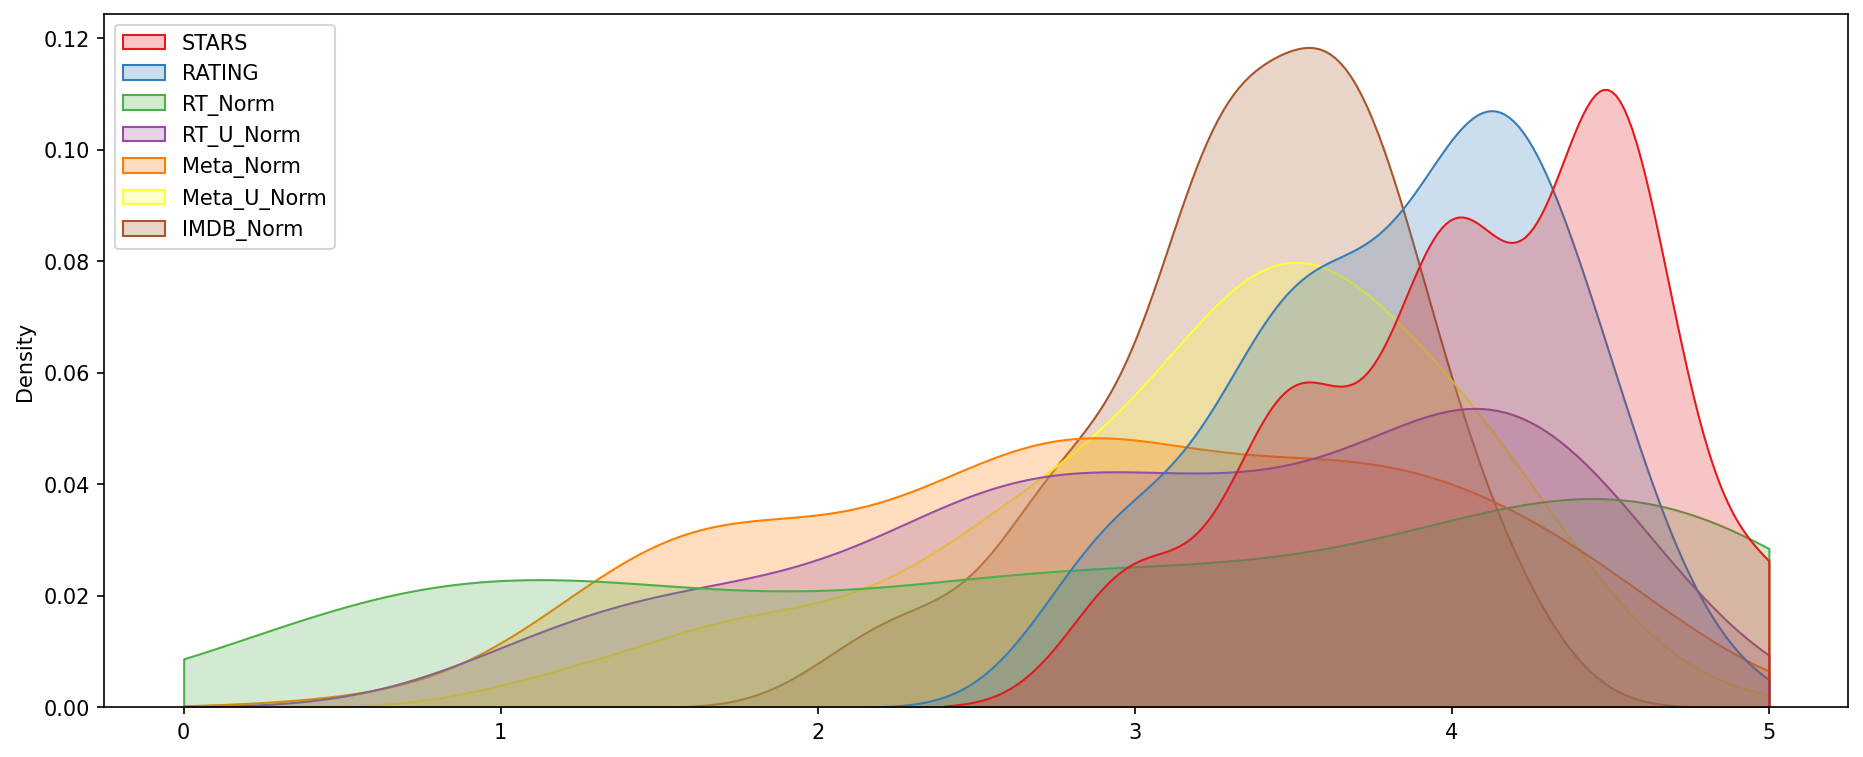

In [153]:
fig, ax = plt.subplots(figsize=(15,6),dpi=150)

sns.kdeplot(data=norm_scores, clip=[0,5],fill=True, palette='Set1', ax=ax)

move_legend(ax, "upper left")

**Clearly Fandango has an uneven distribution. We can also see that RT critics have the most uniform distribution. Let's directly compare these two.** 

**Create a KDE plot that compare the distribution of RT critic ratings against the STARS displayed by Fandango.**

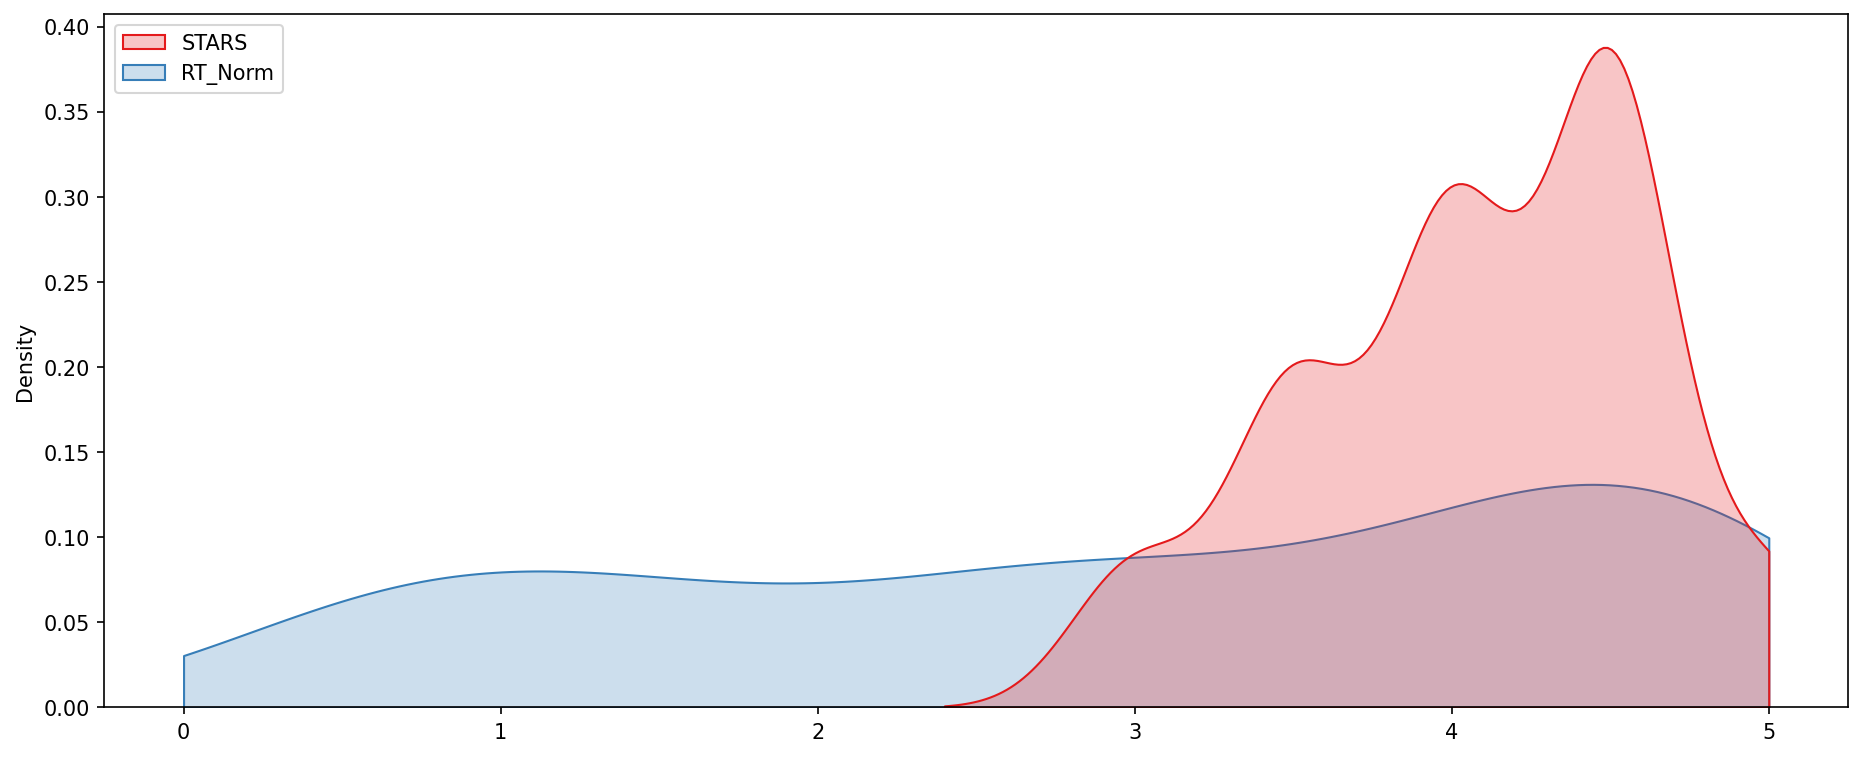

In [154]:
fig, ax = plt.subplots(figsize=(15,6),dpi=150)

data = norm_scores[['STARS', 'RT_Norm']]
sns.kdeplot(data=data, clip=[0,5],fill=True, palette='Set1', ax=ax)

move_legend(ax, "upper left")

**Create a histplot comparing all normalized scores.**

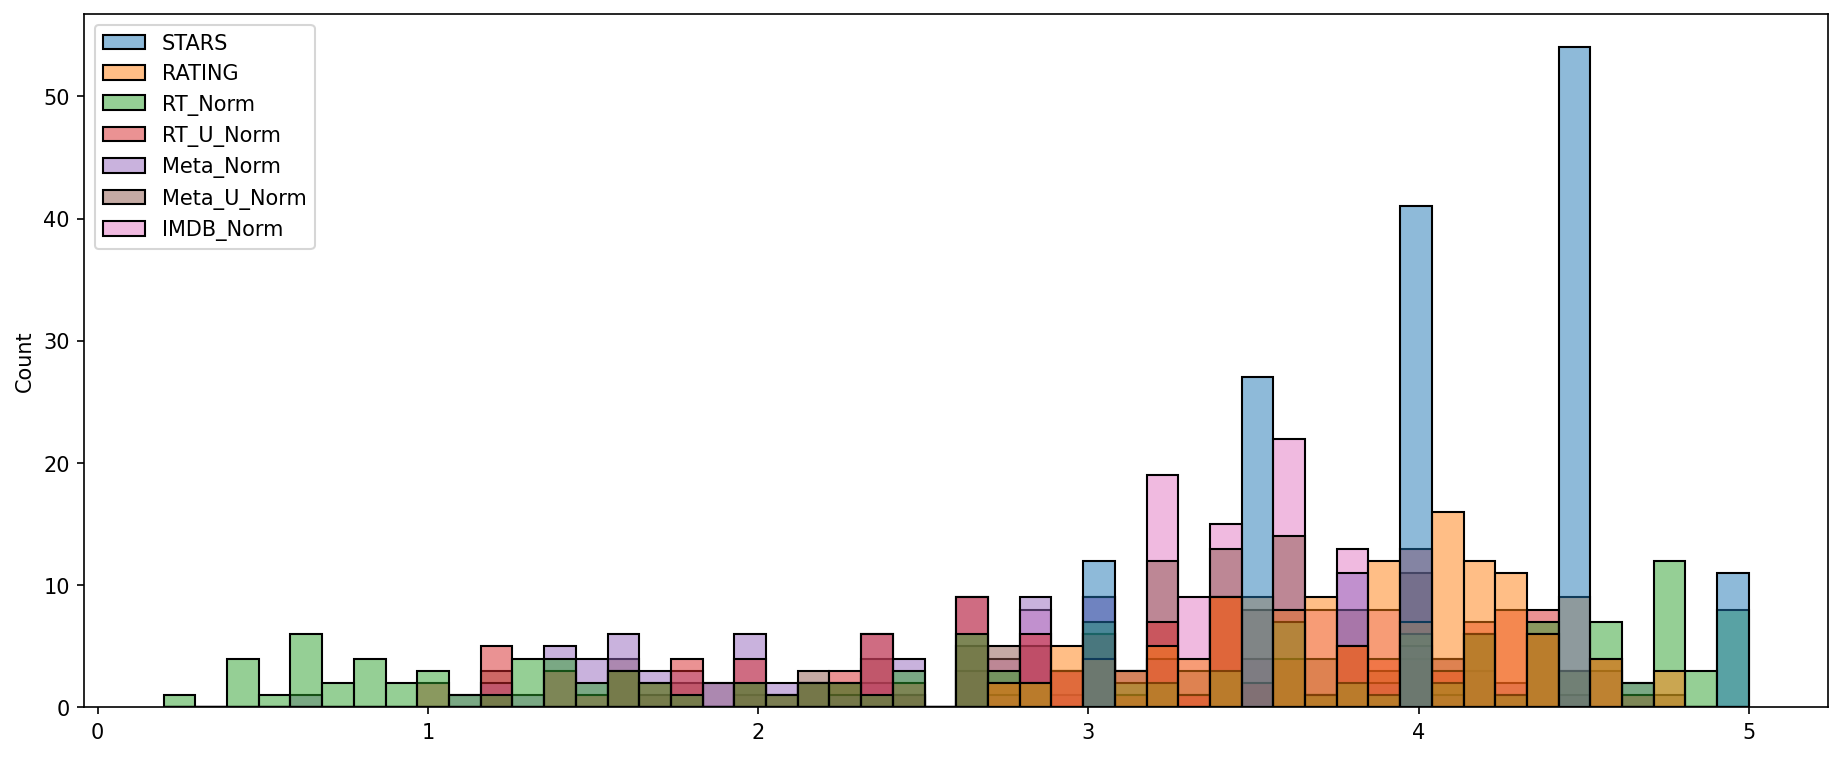

In [161]:
plt.subplots(figsize=(15,6), dpi=150)

ax = sns.histplot(data=norm_scores, bins=50)

sns.move_legend(ax, "upper left")


## The worst movies rated across all platforms

**We will Create a *clustermap visualization* of all normalized scores. Please pay attention to the differences in ratings, highly rated movies should be clustered together versus poorly rated movies.** 

**Note: This clustermap does not need to have the FILM titles as the index, so we will drop it for the clustermap.**

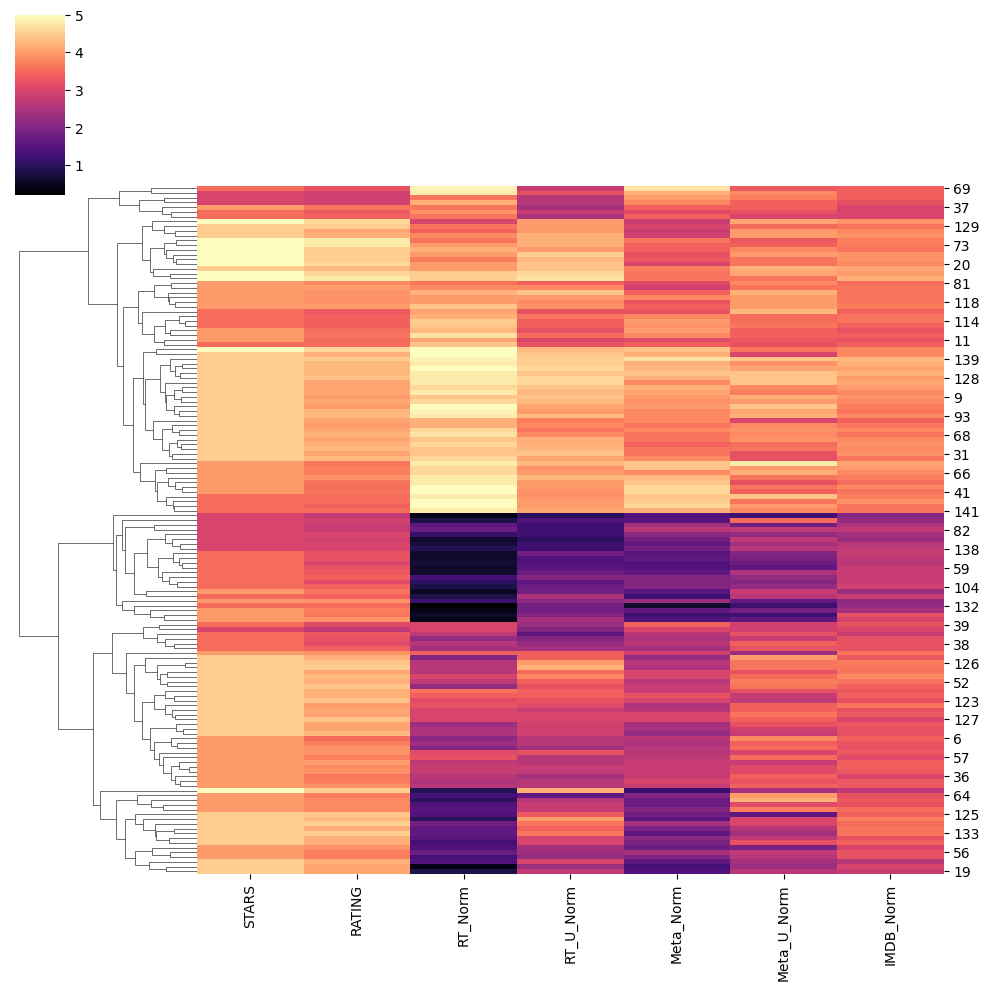

In [162]:
sns.clustermap(norm_scores,cmap='magma',col_cluster=False)

**Clearly, Fandango is rating movies much higher than other sites, especially considering that it is then displaying a rounded-up version of the rating. Let's examine the top 10 worst movies. Based on the Rotten Tomatoes Critic Ratings, what are the top 10 lowest-rated movies? What are the normalized scores across all platforms for these movies? We will need to add the FILM column back into our DataFrame of normalized scores to see the results.** 

In [164]:
norm_films = df[['STARS','RATING','RT_Norm','RT_U_Norm','Meta_Norm','Meta_U_Norm','IMDB_Norm','FILM']]

In [165]:
norm_films.nsmallest(10,'RT_Norm')

,STARS,RATING,RT_Norm,RT_U_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm,FILM
132,3.5,3.5,0.2,1.8,0.6,1.2,2.2,Paul Blart: Mall Cop 2 (2015)
15,4.5,4.1,0.4,2.3,1.3,2.3,3.0,Taken 3 (2015)
48,3.0,2.7,0.4,1.0,1.4,1.2,2.0,Fantastic Four (2015)
53,4.0,3.7,0.4,1.8,1.6,1.8,2.4,Hot Pursuit (2015)
105,4.0,3.9,0.4,2.4,1.4,1.6,3.0,Hitman: Agent 47 (2015)
33,4.0,3.6,0.5,1.8,1.5,2.8,2.3,The Boy Next Door (2015)
35,4.0,3.6,0.6,2.0,1.2,1.2,3.2,The Loft (2015)
58,3.5,3.2,0.6,1.8,1.5,2.0,2.8,Seventh Son (2015)
59,3.5,3.2,0.6,1.5,1.4,1.6,2.8,Mortdecai (2015)
60,3.5,3.2,0.6,1.4,1.6,1.9,2.7,Unfinished Business (2015)


**Visualize the distribution of ratings across all sites for the top 10 worst movies.**

Text(0.5, 1.0, "Ratings for RT Critic's 10 Worst Reviewed Films")

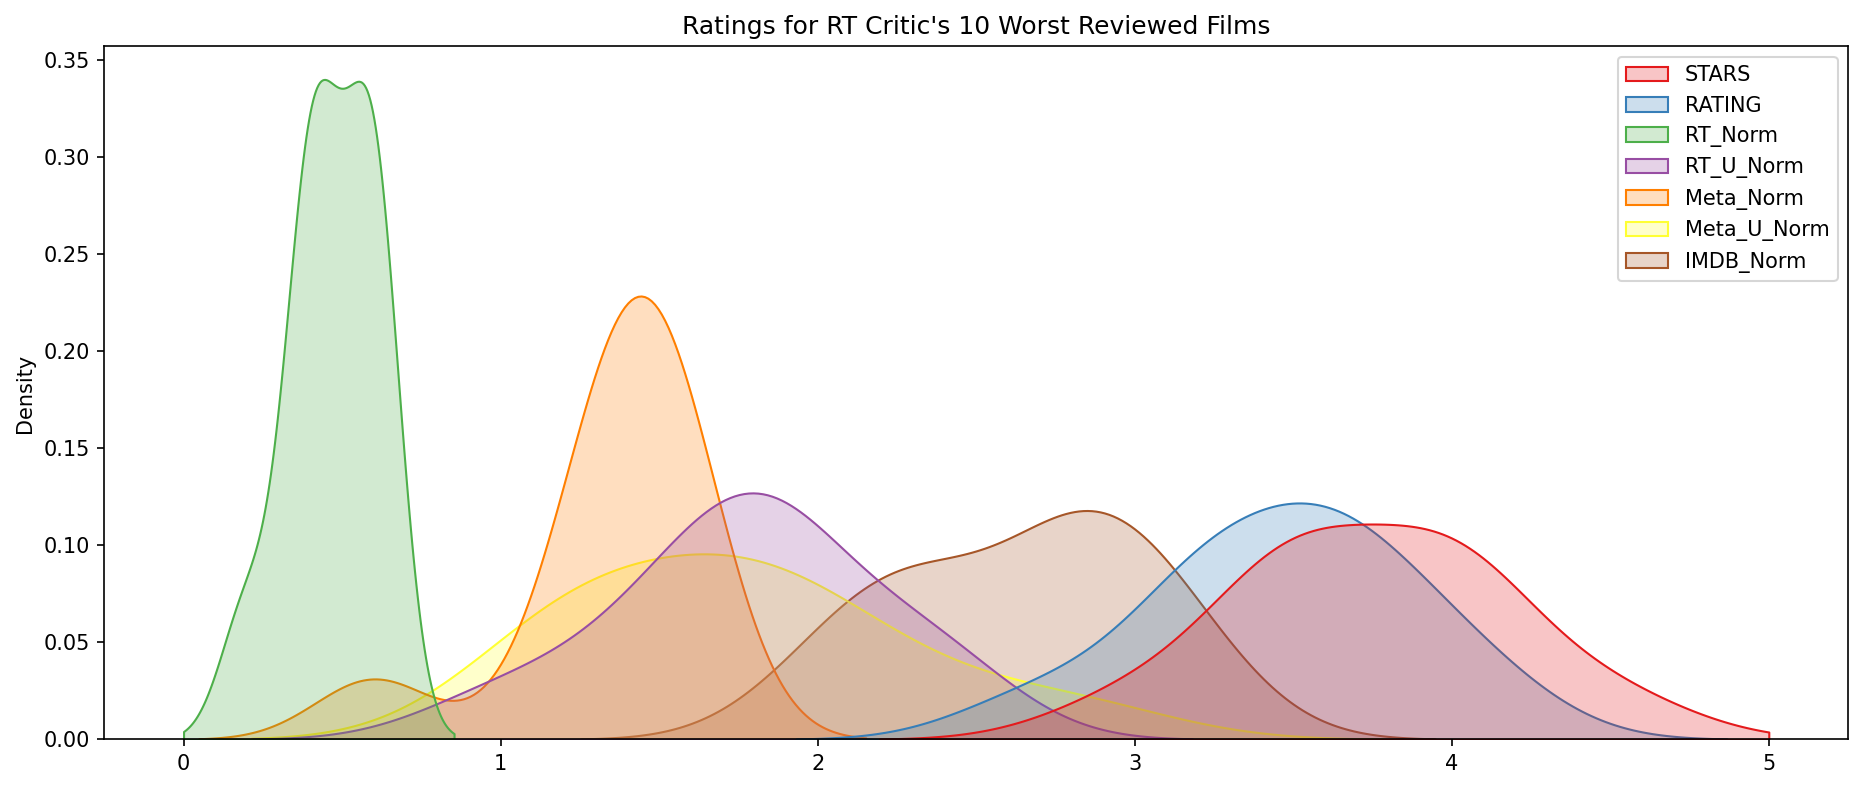

In [166]:
print('\n\n')

plt.figure(figsize=(15,6),dpi=150)

worst_films = norm_films.nsmallest(10,'RT_Norm').drop('FILM',axis=1)

sns.kdeplot(data=worst_films, clip=[0,5], fill=True, palette='Set1')

plt.title("Ratings for RT Critic's 10 Worst Reviewed Films")

---
----

<img src="https://upload.wikimedia.org/wikipedia/en/6/6f/Taken_3_poster.jpg">

**Final thoughts: It is quite unblieveable to see that Fandango is showing around 3-4 star ratings for films that are clearly bad! Notice the biggest offender, [Taken 3!](https://www.youtube.com/watch?v=tJrfImRCHJ0). Fandango is displaying 4.5 stars on their site for a film with an [average rating of 1.86](https://en.wikipedia.org/wiki/Taken_3#Critical_response) across the other platforms!**

In [167]:
norm_films.iloc[25]

STARS                   5.0
RATING                  4.6
RT_Norm                 5.0
RT_U_Norm               4.3
Meta_Norm               4.4
Meta_U_Norm             3.6
IMDB_Norm               3.8
FILM           Selma (2014)
Name: 25, dtype: object

In [168]:
0.4+2.3+1.3+2.3+3

9.3

In [169]:
9.3/5

1.86